<a href="https://colab.research.google.com/github/edmgjr/IFSP-CMP-D2APR-2021.2/blob/main/side-notebooks/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **D2APR: Aprendizado de Máquina e Reconhecimento de Padrões** (IFSP, Campinas) <br/>
**Prof**: Samuel Martins (Samuka) <br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>. <br/><br/>

#### Custom CSS style

In [32]:
%%html
<style>
.dashed-box {
    border: 1px dashed black !important;
#    font-size: var(--jp-content-font-size1) !important;
}

.dashed-box table {

}

.dashed-box tr {
    background-color: white !important;
}
        
.alt-tab {
    background-color: black;
    color: #ffc351;
    padding: 4px;
    font-size: 1em;
    font-weight: bold;
    font-family: monospace;
}
// add your CSS styling here
</style>

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [34]:
np.random.seed(42)

# Polynomial Regression with One Variable

### Generating synthetic (quadratic) data

In [35]:
def generate_quadratic_data(n_samples=100):
    X = 6 * np.random.rand(n_samples, 1) - 3
    y = 0.5 * X.flatten()**2 + X.flatten() + 2 + np.random.randn(n_samples)
    
    return X, y

In [36]:
X_train, y_train = generate_quadratic_data(n_samples=100)
X_test, y_test = generate_quadratic_data(n_samples=20)

Text(0, 0.5, 'y')

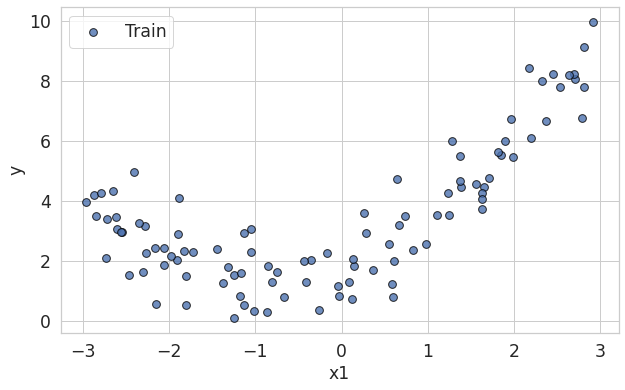

In [37]:
# plot data
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_train[:,0], y=y_train, s=60, edgecolor='black', linewidth=1, alpha=0.8, label='Train')
plt.xlabel('x1')
plt.ylabel('y')

Text(0, 0.5, 'y')

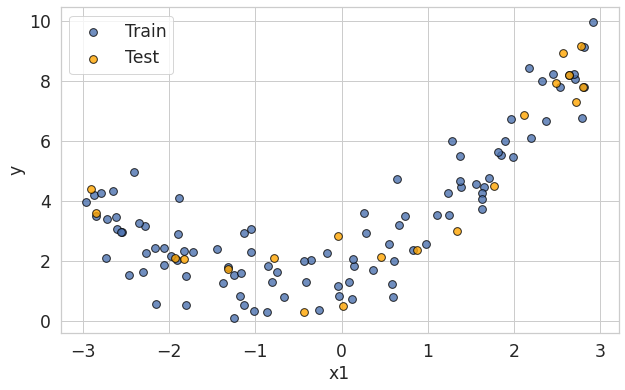

In [38]:
# plot data
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_train[:,0], y=y_train, s=60, edgecolor='black', linewidth=1, alpha=0.8, label='Train')
sns.scatterplot(x=X_test[:,0], y=y_test, s=60, edgecolor='black', linewidth=1, alpha=0.8, color='orange', label='Test')
plt.xlabel('x1')
plt.ylabel('y')

### Polynomial Features
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [39]:
from sklearn.preprocessing import PolynomialFeatures

poly_feat_transformer = PolynomialFeatures(degree=2, include_bias=False)
X_train_pol = poly_feat_transformer.fit_transform(X_train)

In [40]:
X_train[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [41]:
X_train_pol[:5]  # x1, x1^2

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ],
       [ 1.39196365,  1.93756281],
       [ 0.59195091,  0.35040587],
       [-2.06388816,  4.25963433]])

### Training a Polynomial Regression Model
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [42]:
# train Polynomial Regression Model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

poly_feat_transformer = PolynomialFeatures(degree=2, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()


polynomial_regression = Pipeline([
    ('poly_feat_trainsformer', poly_feat_transformer),
    ('std_scaler', std_scaler),
    ('lin_reg', lin_reg)
])


# training our poynomial regression
polynomial_regression.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly_feat_trainsformer',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td>We can consider that the <b>Polynomial Regression model</b> is the combination of all the <b><code>Pipeline</code> steps</b>: <code>polynomial_regression</code>.</td>
</tr>
</table>

In [43]:
polynomial_regression.named_steps

{'lin_reg': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'poly_feat_trainsformer': PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                    order='C'),
 'std_scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [44]:
# we can get the learned parameters from our pipeline model
polynomial_regression.get_params()

{'lin_reg': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'lin_reg__copy_X': True,
 'lin_reg__fit_intercept': True,
 'lin_reg__n_jobs': None,
 'lin_reg__normalize': False,
 'memory': None,
 'poly_feat_trainsformer': PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                    order='C'),
 'poly_feat_trainsformer__degree': 2,
 'poly_feat_trainsformer__include_bias': False,
 'poly_feat_trainsformer__interaction_only': False,
 'poly_feat_trainsformer__order': 'C',
 'std_scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'std_scaler__copy': True,
 'std_scaler__with_mean': True,
 'std_scaler__with_std': True,
 'steps': [('poly_feat_trainsformer',
   PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                      order='C')),
  ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('lin_reg',
   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None

In [45]:
# getting the 'linear regression model'
lin_reg = polynomial_regression.get_params()['lin_reg']

# learned coefficients
theta_0 = lin_reg.intercept_
theta_1, theta_2 = lin_reg.coef_

print('Learned coefficients')
print(f'theta_0 (bias/intercept): {theta_0}')
print(f'theta_1: {theta_1}')
print(f'theta_2: {theta_2}')

Learned coefficients
theta_0 (bias/intercept): 3.4130785883328953
theta_1: 1.6581860892535099
theta_2: 1.5076293430221794


Therefore, the learnd **polynomial regression model** is:

$$
    h_\theta(x) = \theta_0 + \theta_1x_1 + \theta_2x_1^2
$$

$$
    h_\theta(x) = 3.413 + 1.658 x_1 + 1.50 x_1^2
$$

### Prediction

In [46]:
# transform the data, and predict with the final estimator
y_test_pred = polynomial_regression.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f'RMSE = {rmse}')

RMSE = 0.756637970799302


### Visualization

In [48]:
# trick to plot the learned model with lineplot
n_points = 100

# generate many spaced points in the interval [X_train.min(), X_train.max()] 
X_curve = np.linspace(X_train.min(), X_train.max(), n_points).reshape((n_points, 1))

# get the cooresponding y points for these points, according to our model
y_curve = polynomial_regression.predict(X_curve)

Text(0, 0.5, 'y')

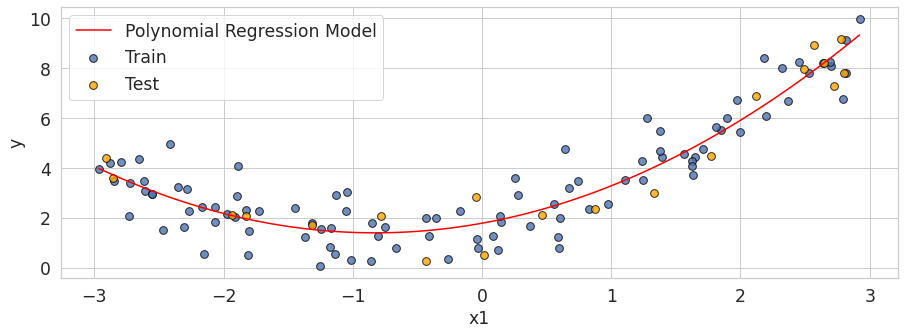

In [49]:
# plotting
# plt.figure(figsize=(10,6))
sns.scatterplot(x=X_train[:,0], y=y_train, s=60, edgecolor='black', linewidth=1, alpha=0.8, label='Train')
sns.scatterplot(x=X_test[:,0], y=y_test, s=60, edgecolor='black', linewidth=1, alpha=0.8, color='orange', label='Test')
sns.lineplot(x=X_curve[:,0], y=y_curve, color='red', label='Polynomial Regression Model')
plt.xlabel('x1')
plt.ylabel('y')

# Polynomial Regression with Multiple Variables

### Generating synthetic (quadratic) data

In [50]:
def generate_data(n_samples=100):
    X = 7 * np.random.rand(n_samples, 2) - 2.8
    y = X[:,0]**2 + X[:,1]**2 + 0.2*X[:,0] + 0.2*X[:,1] + 0.1*X[:,0]*X[:,1] +2 + np.random.randn(n_samples)
    
    return X, y

In [51]:
X_train, y_train = generate_data(n_samples=1000)
X_test, y_test = generate_data(n_samples=100)

In [52]:
import plotly.express as px

fig = px.scatter_3d(x=X_train[:,0], y=X_train[:,1], z=y_train, labels={'x': 'x1', 'y': 'x2', 'z': 'y'}, width=800, height=800)
fig.data[0].update(marker=dict(size=2, opacity=0.8), name='Train', showlegend=True)
fig.add_scatter3d(x=X_test[:,0], y=X_test[:,1], z=y_test, mode='markers', marker=dict(size=2, opacity=0.8, line=dict(width=1, color='black')), name='Test')
fig.show()

### Polynomial Features
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [53]:
from sklearn.preprocessing import PolynomialFeatures

poly_feat_transformer = PolynomialFeatures(degree=2, include_bias=False)
X_train_pol = poly_feat_transformer.fit_transform(X_train)

In [54]:
X_train[:5]  # x1, x2

array([[ 3.26950623,  3.59268387],
       [ 0.77939679,  0.71061406],
       [ 2.78806625,  1.74974752],
       [ 2.11376814,  2.77054869],
       [ 3.43003739, -0.4340339 ]])

In [55]:
X_train_pol[:5]  # x1, x2, x1^2, x1x2, x2^2

array([[ 3.26950623,  3.59268387, 10.68967099, 11.74630229, 12.90737737],
       [ 0.77939679,  0.71061406,  0.60745936,  0.55385032,  0.50497235],
       [ 2.78806625,  1.74974752,  7.77331343,  4.878412  ,  3.06161637],
       [ 2.11376814,  2.77054869,  4.46801575,  5.85629755,  7.67594002],
       [ 3.43003739, -0.4340339 , 11.76515652, -1.48875251,  0.18838543]])

### Training a Polynomial Regression Model
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [56]:
# train Polynomial Regression Model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


poly_feat_transformer = PolynomialFeatures(degree=2, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()


polynomial_regression = Pipeline([
    ('poly_feat_trainsformer', poly_feat_transformer),
    ('std_scaler', std_scaler),
    ('lin_reg', lin_reg)
])


# Fit all the transforms one after the other and transform the data,
# then fit the transformed data using the final estimator.
polynomial_regression.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly_feat_trainsformer',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [57]:
# getting the 'linear regression model'
lin_reg = polynomial_regression.get_params()['lin_reg']

# learned coefficients
theta_0 = lin_reg.intercept_
thetas = lin_reg.coef_

print('Learned coefficients')
print(f'theta_0 (bias/intercept): {theta_0}')
for i, theta in enumerate(thetas):
    print(f'theta_{i+1}: {theta}')

Learned coefficients
theta_0 (bias/intercept): 11.666196999280423
theta_1: 0.43641780209617037
theta_2: 0.35476199642173656
theta_3: 4.542306146614753
theta_4: 0.4779273593477831
theta_5: 4.6458910231925055


Therefore, the learnd **polynomial (linear) regression model** is:

$$
    h_\theta(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_1^2 + \theta_4x_1x_1 + \theta_5x_2^2
$$

$$
    h_\theta(x) = 11.66 + 0.43x_1 + 0.35x_2 + 4.54x_1^2 + 0.47x_1x_2 + 4.64x_2^2
$$

### Prediction

In [58]:
# apply transforms to the data, and predict with the final estimator
y_test_pred = polynomial_regression.predict(X_test)

In [59]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print(f'RMSE = {rmse}')

RMSE = 1.095259943625038


### Visualization

In [60]:
# trick to plot the learned model with lineplot
#
# To plot a surface by Plotly, we need to build a meshgrid with our features.
# These meshgrids are matrices that contain feature vectors for all possible combination between the available features.

n_points = 100

# generate many spaced points in the interval [X_train.min(), X_train.max()] 
x1_curve = np.linspace(X_train[:,0].min(), X_train[:,0].max(), n_points).reshape((n_points, 1))
x2_curve = np.linspace(X_train[:,1].min(), X_train[:,1].max(), n_points).reshape((n_points, 1))


X1, X2 = np.meshgrid(x1_curve, x2_curve)
x1_curve_all = X1.ravel()
x1_curve_all = x1_curve_all.reshape((x1_curve_all.size, 1))  # column vector
x2_curve_all = X2.ravel()
x2_curve_all = x2_curve_all.reshape((x2_curve_all.size, 1))  # column vector

# create a feature matriz with x1, x2 feats for all curve range
X_curve_all = np.hstack((x1_curve_all, x2_curve_all))
y_curve_all = polynomial_regression.predict(X_curve_all)

Y = y_curve_all.reshape(X1.shape)

## output layout
# e.g.:
# x1_curve = [0, 0.5, 1]
# x2_curve = [3, 4, 5]
#
# X1 = [
#        [0. , 0.5, 1.],
#        [0. , 0.5, 1.],
#        [0. , 0.5, 1.]]
# X2 = [
#        [3 , 3, 3],
#        [4 , 4, 4],
#        [5 , 5, 5]]
#
# x1_curve_all = [[
#                   0.,
#                   0.5,
#                   1,
#                   0.,
#                   0.5,
#                   1,
#                   0.,
#                   0.5,
#                   1]]
# x2_curve_all = [[
#                   3,
#                   4,
#                   5,
#                   3,
#                   4,
#                   5,
#                   3,
#                   4,
#                   5]]
#
# // feature matrix with all possible combination between the x1 and x2 features.
# // each row is a feature vector (instance) of this combination.
# X_curve_all = [
#                 [0, 3],
#                 [0.5, 3],
#                 [1, 3],
#                 [0, 4],
#                 [0.5, 4],
#                 [1, 4],
#                 [0, 5],
#                 [0.5, 5],
#                 [1, 5]]

# y = [#, #, #, ..., #]  // 1D array with the
# Y // 2D array with the shape of the used meshgrid by reshaping the 1D label array y

In [63]:
import plotly.express as px
import plotly.graph_objects as go

# fig = go.Figure(data=[go.Surface(x=X1, y=X2, z=Y)])

fig = px.scatter_3d(x=X_train[:,0], y=X_train[:,1], z=y_train, labels={'x': 'x1', 'y': 'x2', 'z': 'y'}, width=1000, height=800)
fig.data[0].update(marker=dict(size=2, opacity=0.8), name='Train', showlegend=True)
fig.add_scatter3d(x=X_test[:,0], y=X_test[:,1], z=y_test, mode='markers', marker=dict(size=2, opacity=0.8, line=dict(width=1, color='black')), name='Test')
fig.add_surface(x=X1, y=X2, z=Y, colorscale=[[0, '#FFD700'], [1, '#FFD700']], showscale=False, name='Pol. Regression Model')
fig.show()

# Exercise
Apply the same steps seen above for the data below.

Tip: Consider a **cubic function** (degree = 3).

In [64]:
def generate_cubic_data(n_samples=100):
    X = 6 * np.random.rand(n_samples, 1) - 3
    y = 0.5 * X.flatten()**3 + np.random.randn(n_samples)
    
    return X, y

In [65]:
X_train, y_train = generate_cubic_data(n_samples=100)
X_test, y_test = generate_cubic_data(n_samples=20)

Text(0, 0.5, 'y')

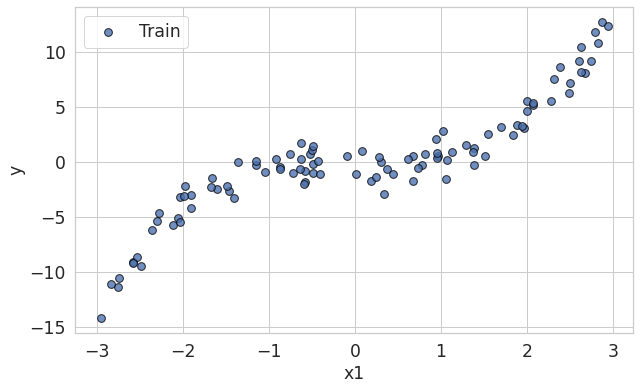

In [68]:
# plot data
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_train[:,0], y=y_train, s=60, edgecolor='black', linewidth=1, alpha=0.8, label='Train')
plt.xlabel('x1')
plt.ylabel('y')

Text(0, 0.5, 'y')

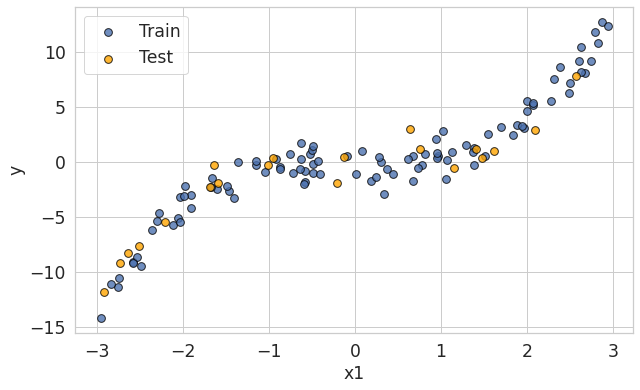

In [69]:
# plot data
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_train[:,0], y=y_train, s=60, edgecolor='black', linewidth=1, alpha=0.8, label='Train')
sns.scatterplot(x=X_test[:,0], y=y_test, s=60, edgecolor='black', linewidth=1, alpha=0.8, color='orange', label='Test')
plt.xlabel('x1')
plt.ylabel('y')

In [70]:
from sklearn.preprocessing import PolynomialFeatures

poly_feat_transformer = PolynomialFeatures(degree=3, include_bias=False)
X_train_pol = poly_feat_transformer.fit_transform(X_train)

In [71]:
X_train

array([[-2.03268713],
       [ 0.93845762],
       [ 2.82690544],
       [ 0.37313287],
       [ 1.28851966],
       [-2.58929728],
       [-0.49399803],
       [-2.30184909],
       [ 0.67677501],
       [ 2.63089295],
       [ 0.97066639],
       [-2.53918171],
       [-0.87200277],
       [ 0.30398028],
       [-0.58075346],
       [ 2.00186406],
       [ 1.88802603],
       [ 0.67098612],
       [-0.75925233],
       [-1.46798176],
       [-2.36475409],
       [-0.8706139 ],
       [-0.5209649 ],
       [ 1.05493755],
       [ 0.94895895],
       [-2.57935116],
       [-0.62844411],
       [-1.9093268 ],
       [-2.05912377],
       [ 1.9638129 ],
       [-2.7485087 ],
       [-0.48490274],
       [-1.99077807],
       [ 2.27598129],
       [ 0.34224308],
       [-1.61171618],
       [ 0.01456372],
       [ 1.38891816],
       [ 2.74870805],
       [-1.67732397],
       [ 2.31709063],
       [ 2.60582469],
       [ 2.49852327],
       [ 0.81248614],
       [ 0.77892393],
       [-0

In [72]:
X_train_pol

array([[-2.03268713e+00,  4.13181696e+00, -8.39869115e+00],
       [ 9.38457621e-01,  8.80702706e-01,  8.26502167e-01],
       [ 2.82690544e+00,  7.99139439e+00,  2.25909163e+01],
       [ 3.73132866e-01,  1.39228136e-01,  5.19505935e-02],
       [ 1.28851966e+00,  1.66028291e+00,  2.13930717e+00],
       [-2.58929728e+00,  6.70446043e+00, -1.73598412e+01],
       [-4.93998025e-01,  2.44034049e-01, -1.20552338e-01],
       [-2.30184909e+00,  5.29850923e+00, -1.21963686e+01],
       [ 6.76775013e-01,  4.58024419e-01,  3.09979482e-01],
       [ 2.63089295e+00,  6.92159771e+00,  1.82099826e+01],
       [ 9.70666395e-01,  9.42193250e-01,  9.14555325e-01],
       [-2.53918171e+00,  6.44744376e+00, -1.63712313e+01],
       [-8.72002770e-01,  7.60388831e-01, -6.63061167e-01],
       [ 3.03980277e-01,  9.24040086e-02,  2.80889961e-02],
       [-5.80753463e-01,  3.37274585e-01, -1.95873383e-01],
       [ 2.00186406e+00,  4.00745973e+00,  8.02238961e+00],
       [ 1.88802603e+00,  3.56464228e+00

In [73]:
# train Polynomial Regression Model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

poly_feat_transformer = PolynomialFeatures(degree=3, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()


polynomial_regression = Pipeline([
    ('poly_feat_trainsformer', poly_feat_transformer),
    ('std_scaler', std_scaler),
    ('lin_reg', lin_reg)
])


# training our poynomial regression
polynomial_regression.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly_feat_trainsformer',
                 PolynomialFeatures(degree=3, include_bias=False,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [74]:
y_test_pred = polynomial_regression.predict(X_test)

In [75]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f'RMSE = {rmse}')

RMSE = 1.2059216950557774


In [76]:
# trick to plot the learned model with lineplot
n_points = 100

# generate many spaced points in the interval [X_train.min(), X_train.max()] 
X_curve = np.linspace(X_train.min(), X_train.max(), n_points).reshape((n_points, 1))

# get the cooresponding y points for these points, according to our model
y_curve = polynomial_regression.predict(X_curve)

Text(0, 0.5, 'y')

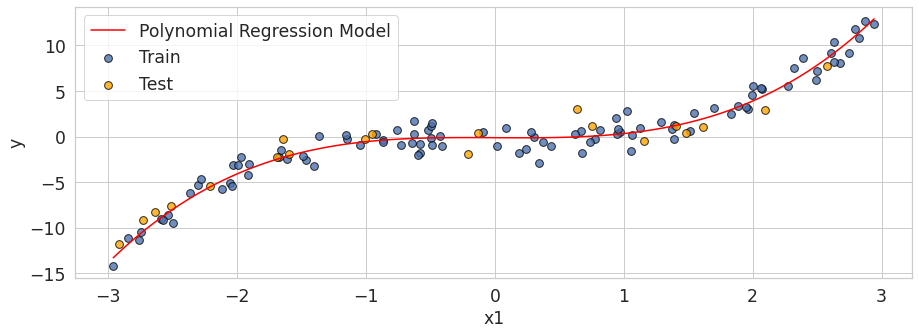

In [77]:
# plotting
# plt.figure(figsize=(10,6))
sns.scatterplot(x=X_train[:,0], y=y_train, s=60, edgecolor='black', linewidth=1, alpha=0.8, label='Train')
sns.scatterplot(x=X_test[:,0], y=y_test, s=60, edgecolor='black', linewidth=1, alpha=0.8, color='orange', label='Test')
sns.lineplot(x=X_curve[:,0], y=y_curve, color='red', label='Polynomial Regression Model')
plt.xlabel('x1')
plt.ylabel('y')